In [1]:
import os
import re
import cltk
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

/home/johanneshermannpalboel/thesis/BoB-thesis/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
epitome_numbers = []
epitomes = []
    
for file in os.listdir('../epitomes'):
    epitome_numbers.append(int(re.search('\d+', file).group()))
    with open(os.path.join('../epitomes', file), 'r', encoding='utf-8') as f:
        epitomes.append(f.readlines()[-1])

In [9]:
epitomes_str = "".join(epitomes)

In [11]:
cltk_nlp = cltk.NLP(language="lat", suppress_banner=True)

In [13]:
# for some reason this requires pip<22, see https://github.com/explosion/spaCy/issues/13599
epitomes_docs = []
for epitome in epitomes:
    cltk_doc = cltk_nlp.analyze(text=epitome)
    epitomes_docs.append(cltk_doc)

/home/johanneshermannpalboel/thesis/BoB-thesis/.venv/lib/python3.11/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'la_core_web_lg' (3.7.7) was trained with spaCy v3.7.5 and may not be 100% compatible with the current version (3.7.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Unrecognized value 'Perf' for UD feature 'Tense'.
If you believe this is not an error in the dependency parser, please raise an issue at <https://github.com/cltk/cltk/issues> and include a short text to reproduce the error.

Unrecognized value 'Perf' for UD feature 'Tense'.
If you believe this is not an error in the dependency parser, please raise an issue at <https://github.com/cltk/cltk/issues> and include a short text to reproduce the error.

Unrecognized value 'Perf' for UD feature 'Tense'.
If you believe this is not an error in the dependency parser, please raise an issue at <https://github.com/cltk/cltk/issues> and include a short text to reproduce the error.

Unrecognized value 'Perf' for UD feature 'Tense'.
If you believe this is not an error in the dependency parser, please raise an issue at <https://github.com/cltk/cltk/issues> and include a short text to reproduce the error.

Unrecognized value 'Perf' for UD feature 'Tense'.
If you believe this is not an error in the depende

In [7]:
pos_counter = Counter(cltk_doc1.pos)

/tmp/ipykernel_8091/3261793011.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


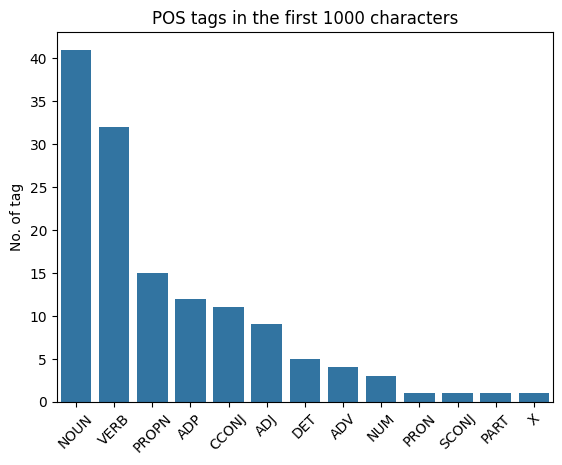

In [11]:
fig, ax = plt.subplots()
sns.barplot(data=dict(pos_counter.most_common()), ax=ax)
ax.set_title('POS tags in the first 1000 characters')
ax.set_ylabel('No. of tag')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);